# 🖼️ Détecteur visuel de logos et zones spécifiques 

In [2]:
pip install opencv-python

Note: you may need to restart the kernel to use updated packages.


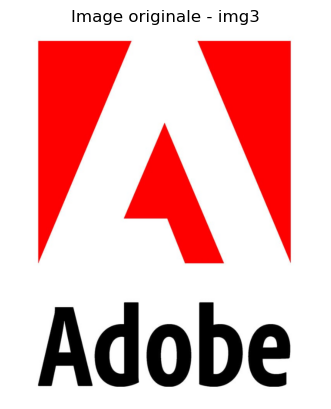

In [4]:
import cv2 as cv
import matplotlib.pyplot as plt

image = cv.imread("img3.png")
image_rgb = cv.cvtColor(image, cv.COLOR_BGR2RGB)

plt.imshow(image_rgb)
plt.title("Image originale - img3")
plt.axis("off")
plt.show()


🎨 Séparation des composantes de couleur

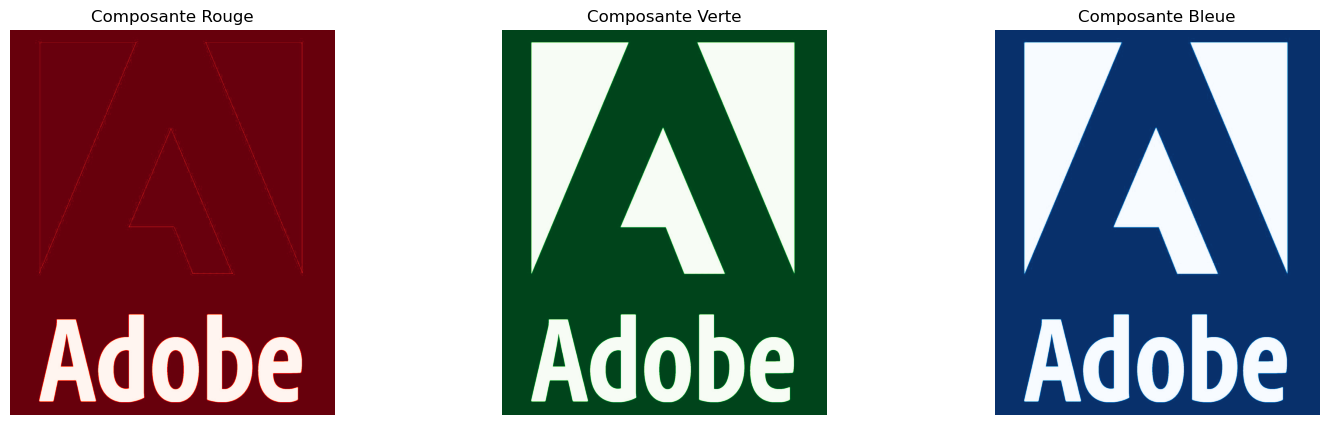

In [5]:
rouge = image[:, :, 2]
vert = image[:, :, 1]
bleu = image[:, :, 0]

fig, axs = plt.subplots(1, 3, figsize=(18, 5))
axs[0].imshow(rouge, cmap="Reds")
axs[0].set_title("Composante Rouge")
axs[1].imshow(vert, cmap="Greens")
axs[1].set_title("Composante Verte")
axs[2].imshow(bleu, cmap="Blues")
axs[2].set_title("Composante Bleue")

for ax in axs:
    ax.axis("off")

plt.show()


📐  Dérivées visuelles (bordures)

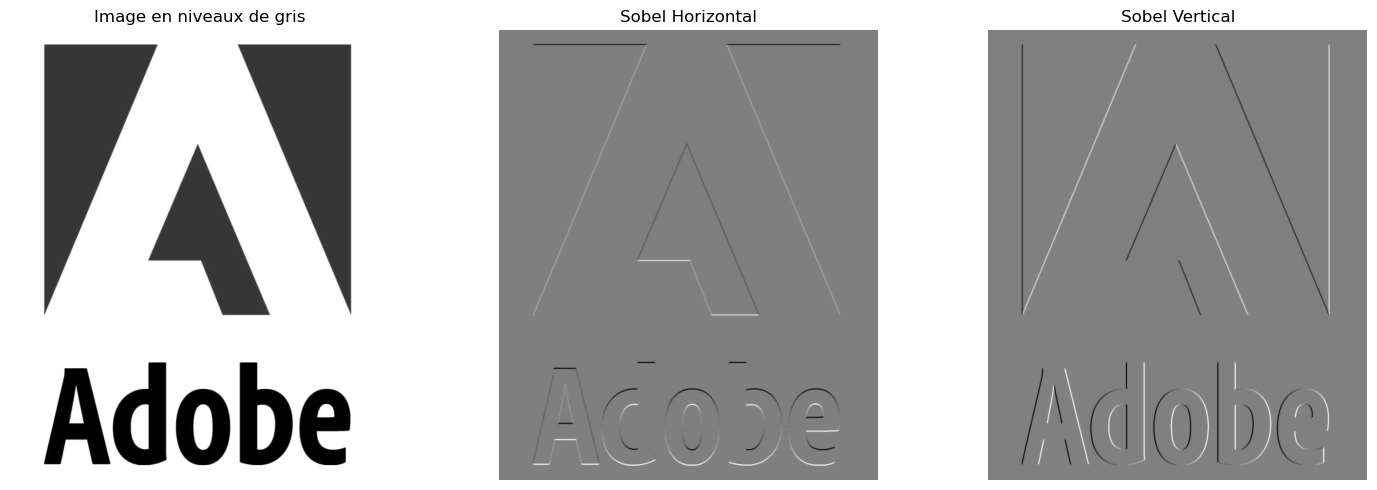

In [10]:
import matplotlib.pyplot as plt
from skimage import color, filters
from skimage.io import imread

# Chargement de l'image
image_sk = imread("img3.png")

# Supprimer le canal alpha si présent
if image_sk.shape[-1] == 4:
    image_sk = image_sk[:, :, :3]

# Conversion en niveaux de gris
image_gray = color.rgb2gray(image_sk)

# Filtres de Sobel (horizontal et vertical)
dx = filters.sobel_h(image_gray)
dy = filters.sobel_v(image_gray)

# Affichage
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
axes[0].imshow(image_gray, cmap='gray')
axes[0].set_title("Image en niveaux de gris")
axes[0].axis('off')

axes[1].imshow(dx, cmap='gray')
axes[1].set_title("Sobel Horizontal")
axes[1].axis('off')

axes[2].imshow(dy, cmap='gray')
axes[2].set_title("Sobel Vertical")
axes[2].axis('off')

plt.tight_layout()
plt.show()


🔍  Zoom sur des zones spécifiques

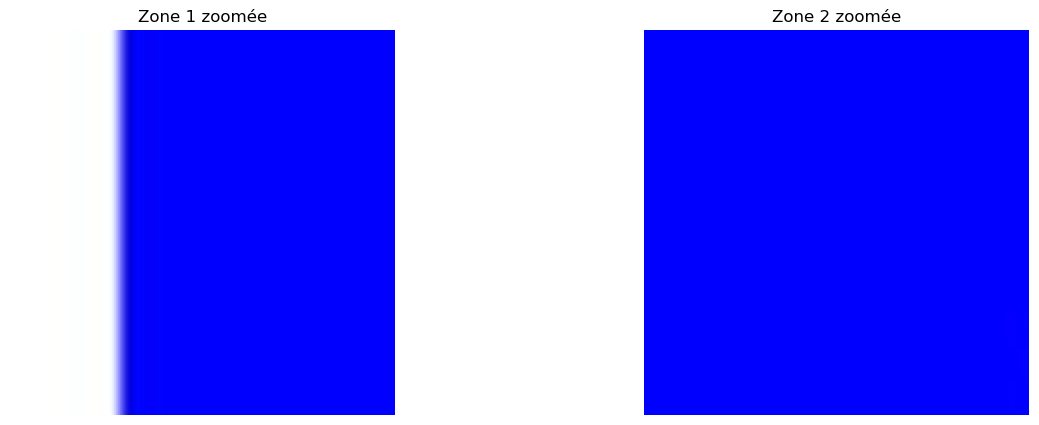

In [14]:
from scipy.ndimage import zoom


zone1 = zoom(image[50:100, 50:100], (4, 4, 1))
zone2 = zoom(image[150:200, 150:200], (4, 4, 1))

fig, axs = plt.subplots(1, 2, figsize=(15, 5))
axs[0].imshow(cv.cvtColor(zone1, cv.COLOR_BGR2RGB))
axs[0].set_title("Zone 1 zoomée")
axs[1].imshow(cv.cvtColor(zone2, cv.COLOR_BGR2RGB))
axs[1].set_title("Zone 2 zoomée")

for ax in axs:
    ax.axis("off")

plt.show()


💾 Sauvegarde des zones extraites

In [15]:
cv.imwrite("zone1_zoom.png", zone1)
cv.imwrite("zone2_zoom.png", zone2)
print("📁 Zones enregistrées avec succès !")


📁 Zones enregistrées avec succès !


🧠  Extraction automatique par couleur dominante

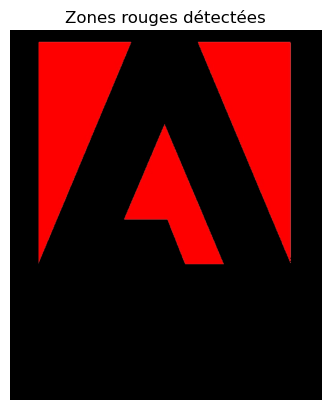

In [16]:
# Masque des pixels avec forte intensité rouge
masque_rouge = (rouge > 150) & (vert < 100) & (bleu < 100)


image_masquee = image_rgb.copy()
image_masquee[~masque_rouge] = 0

plt.imshow(image_masquee)
plt.title("Zones rouges détectées")
plt.axis("off")
plt.show()


Statistiques sur les zones extraites

In [17]:
from scipy.stats import describe

# Zone exemple
zone_test = image[50:100, 50:100]


for i, name in enumerate(["Bleu", "Vert", "Rouge"]):
    stats = describe(zone_test[:, :, i], axis=None)
    print(f"{name} – Min: {stats.minmax[0]}, Max: {stats.minmax[1]}, Mean: {stats.mean:.2f}")


Bleu – Min: 223, Max: 255, Mean: 253.36
Vert – Min: 0, Max: 255, Mean: 73.90
Rouge – Min: 0, Max: 255, Mean: 73.74
